In [2]:
#Librerias usadas en este programa
import pandas as pd
import numpy as np
import csv
import os
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
#Ejecutar esta linea de abajo solo una vez para tener las stopwords en español
#nltk.download('stopwords')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup

In [2]:
#Bloque que realiza web scraping y almacena los textos divididos por carpeta dependiendo de sus tags
i = 1
contador = 0
while i < 27:
    URL = 'https://votainteligente.cl/propuestas/?page='+str(i)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find(id='posts')
    job_elems = results.find_all('div', class_='post')
    for job_elem in job_elems:
        try:
            category = job_elem.find('a')['href']
            category = re.search("clasification=(.*)", category)
            category = category.group(1)
            title = job_elem.find('h4')
            title = title.text
            title = re.sub("/", "-", title)
            leer_mas = job_elem.find('a', class_='btn btn-blue pull-right')['href']
            URL = 'https://votainteligente.cl'+leer_mas
            page = requests.get(URL)
            soup = BeautifulSoup(page.content, 'html.parser')
            cuerpo = soup.find('div', class_='col-md-12')
            cuerpo = cuerpo.find('p')
            cuerpo = cuerpo.text

            politica = ['politica', 'justicia', 'transparencia','democracia','institucionespublicas']
            medioambiente = ['medioambiente','medio_ambiente','sustentabilidad','recursosnaturales','emergencia']
            social = ['diversidad','derechos','asistencia','proteccion_y_familia','participacion','genero','migracion','proteccionsocial','seguridad','pensiones','pueblosoriginarios','medios','probidad','proteccionanimal','derechoshumanos','espaciospublicos','infancia','terceraedad']
            sanidad = ['salud']
            culturayciencia = ['cultura','deporte','tecnologia','ciencias','energia','ocio']
            interior = ['transporte','educacion','trabajo','empleo','economia','descentralizacion','emprendimiento','educacion_y_trabajo']

            if category in politica:
                if not os.path.exists('./dataset/'+'politica'):
                    os.makedirs('./dataset/'+'politica')
                f= open('./dataset/'+'politica'+'/'+title,"w+")
                f.write(cuerpo)
                contador+=1
                f.close()
            if category in medioambiente:
                if not os.path.exists('./dataset/'+'medioambiente'):
                    os.makedirs('./dataset/'+'medioambiente')
                f= open('./dataset/'+'medioambiente'+'/'+title,"w+")
                f.write(cuerpo)
                contador+=1
                f.close()
            if category in social:
                if not os.path.exists('./dataset/'+'social'):
                    os.makedirs('./dataset/'+'social')
                f= open('./dataset/'+'social'+'/'+title,"w+")
                f.write(cuerpo)
                contador+=1
                f.close()
            if category in sanidad:
                if not os.path.exists('./dataset/'+'sanidad'):
                    os.makedirs('./dataset/'+'sanidad')
                f= open('./dataset/'+'sanidad'+'/'+title,"w+")
                f.write(cuerpo)
                contador+=1
                f.close()
            if category in culturayciencia:
                if not os.path.exists('./dataset/'+'culturayciencia'):
                    os.makedirs('./dataset/'+'culturayciencia')
                f= open('./dataset/'+'culturayciencia'+'/'+title,"w+")
                f.write(cuerpo)
                contador+=1
                f.close()
            if category in interior:
                if not os.path.exists('./dataset/'+'interior'):
                    os.makedirs('./dataset/'+'interior')
                f= open('./dataset/'+'interior'+'/'+title,"w+")
                f.write(cuerpo)
                contador+=1
                f.close()
        except:
            continue
    print('Pagina '+ str(i) + ' scrapeada')
    i += 1
print(f'Numero total de textos = {contador}')

Pagina 1 scrapeada
Pagina 2 scrapeada
Pagina 3 scrapeada
Pagina 4 scrapeada
Pagina 5 scrapeada
Pagina 6 scrapeada
Pagina 7 scrapeada
Pagina 8 scrapeada
Pagina 9 scrapeada
Pagina 10 scrapeada
Pagina 11 scrapeada
Pagina 12 scrapeada
Pagina 13 scrapeada
Pagina 14 scrapeada
Pagina 15 scrapeada
Pagina 16 scrapeada
Pagina 17 scrapeada
Pagina 18 scrapeada
Pagina 19 scrapeada
Pagina 20 scrapeada
Pagina 21 scrapeada
Pagina 22 scrapeada
Pagina 23 scrapeada
Pagina 24 scrapeada
Pagina 25 scrapeada
Pagina 26 scrapeada
Numero total de textos = 748


In [3]:
#En este bloque se leen todos los archivos txt y se incluyen en un dataframe
col_names =  ['category', 'title', 'content'] 
df  = pd.DataFrame(columns = col_names) 
path = r"dataset\culturayciencia"
categoria= "culturayciencia"
directories = os.listdir( path )
 

for file in directories:
    #print("El nombre de archivo es: "+ file)
    #print("La categoria del archivo es: "+ categoria)
    objText = open(path+"\\"+file,"r",encoding='ANSI')
    lstLines = objText.read()
    titulo = file
    cuerpo = re.findall(r".*",lstLines)
    #print("El titulo es: "+ titulo)
    #print("El cuerpo es: "+ cuerpo[0])
    new_row = {'category':categoria, 'title':titulo, 'content':cuerpo[0]}
    df = df.append(new_row, ignore_index=True)
    #print()

path = r"dataset\interior"
categoria= "interior"
directories = os.listdir( path )
 

for file in directories:
    #print("El nombre de archivo es: "+ file)
    #print("La categoria del archivo es: "+ categoria)
    objText = open(path+"\\"+file,"r",encoding='ANSI')
    lstLines = objText.read()
    titulo = file
    cuerpo = re.findall(r".*",lstLines)
    #print("El titulo es: "+ titulo)
    #print("El cuerpo es: "+ cuerpo[0])
    new_row = {'category':categoria, 'title':titulo, 'content':cuerpo[0]}
    df = df.append(new_row, ignore_index=True)
    #print()

path = r"dataset\medioambiente"
categoria= "medioambiente"
directories = os.listdir( path )
 

for file in directories:
    #print("El nombre de archivo es: "+ file)
    #print("La categoria del archivo es: "+ categoria)
    objText = open(path+"\\"+file,"r",encoding='ANSI')
    lstLines = objText.read()
    titulo = file
    cuerpo = re.findall(r".*",lstLines)
    #print("El titulo es: "+ titulo)
    #print("El cuerpo es: "+ cuerpo[0])
    new_row = {'category':categoria, 'title':titulo, 'content':cuerpo[0]}
    df = df.append(new_row, ignore_index=True)
    #print()

path = r"dataset\politica"
categoria= "politica"
directories = os.listdir( path )
 

for file in directories:
    #print("El nombre de archivo es: "+ file)
    #print("La categoria del archivo es: "+ categoria)
    objText = open(path+"\\"+file,"r",encoding='ANSI')
    lstLines = objText.read()
    titulo = file
    cuerpo = re.findall(r".*",lstLines)
    #print("El titulo es: "+ titulo)
    #print("El cuerpo es: "+ cuerpo[0])
    new_row = {'category':categoria, 'title':titulo, 'content':cuerpo[0]}
    df = df.append(new_row, ignore_index=True)
    #print()

path = r"dataset\sanidad"
categoria= "sanidad"
directories = os.listdir( path )
 

for file in directories:
    #print("El nombre de archivo es: "+ file)
    #print("La categoria del archivo es: "+ categoria)
    objText = open(path+"\\"+file,"r",encoding='ANSI')
    lstLines = objText.read()
    titulo = file
    cuerpo = re.findall(r".*",lstLines)
    #print("El titulo es: "+ titulo)
    #print("El cuerpo es: "+ cuerpo[0])
    new_row = {'category':categoria, 'title':titulo, 'content':cuerpo[0]}
    df = df.append(new_row, ignore_index=True)
    #print()

path = r"dataset\social"
categoria= "social"
directories = os.listdir( path )
 

for file in directories:
    #print("El nombre de archivo es: "+ file)
    #print("La categoria del archivo es: "+ categoria)
    objText = open(path+"\\"+file,"r",encoding='ANSI')
    lstLines = objText.read()
    titulo = file
    cuerpo = re.findall(r".*",lstLines)
    #print("El titulo es: "+ titulo)
    #print("El cuerpo es: "+ cuerpo[0])
    new_row = {'category':categoria, 'title':titulo, 'content':cuerpo[0]}
    df = df.append(new_row, ignore_index=True)
    #print()
        
df['category_id'] = df['category'].factorize()[0]
df

,category,title,content,category_id
0,culturayciencia,Acceso a la cultura y el conocimiento,El sistema de derechos de autor se encuentra d...,0
1,culturayciencia,Acercando a la Biblioteca,Las bibliotecas publicas no son usadas por los...,0
2,culturayciencia,"Arte, cultura",Valorización del arte en chile.,0
3,culturayciencia,Cambio de paradigma por parte del estado en la...,Contaminación de las ciudades y altos costos d...,0
4,culturayciencia,CAMBIO DE SISTEMA EDUCATIVO,,0
...,...,...,...,...
693,social,Vivienda Digna por un futuro mejor (Dirigentes...,Chile cuenta con más de 40.000 familias vivien...,5
694,social,Vivienda Social Digna. Entregar los recursos y...,Viviendas sociales dignas y acordes a las nece...,5
695,social,"¡MENOS TRABAJO, MAS TIEMPO CON LA FAMILIA!",MARCHAR PARA EXIGIR UNA LEY PARA QUE PADRES Y ...,5
696,social,“HACER COSAS BUENAS” SIN DISCRIMINACIÓN PARA T...,Que el presidente se preocupe de incorporar en...,5


In [4]:
#En este bloque se guardan ordenados los valores por categoria y su id
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

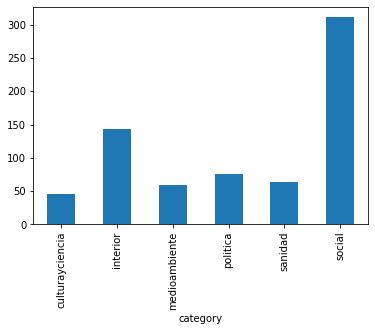

In [5]:
#En este bloque se imprime por pantalla una grafica de cuantos archivos hay por cada categoria
fig = plt.figure(figsize=(6,4))
df.groupby('category').content.count().plot.bar(ylim=0)
plt.show()
#Forma mas resumida de mostrar el grafico
#df.groupby('category').filename.count().plot.bar(ylim=0)

In [6]:
#En este bloque se crea la matriz TF-IDF con los stopwords de español
stop_es=stopwords.words('spanish')
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_es)
features = tfidf.fit_transform(df.content).toarray()
labels = df.category_id
features.shape

(698, 1498)

In [7]:
#En este bloque se imprime los unigramas y bigramas mas representativos de cada clase. Hay un fallo en esta libreria en el
#caso de ser solo dos clases.
N = 3
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Unigramas mas representativos:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Bigramas mas representativos:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'culturayciencia':
  . Unigramas mas representativos:
. deportistas
. canchas
. deporte
  . Bigramas mas representativos:
. aire libre
. tiempo libre
. falta recursos
# 'interior':
  . Unigramas mas representativos:
. colegios
. profesores
. educación
  . Bigramas mas representativos:
. educación calidad
. educación gratuita
. calidad educación
# 'medioambiente':
  . Unigramas mas representativos:
. reciclaje
. contaminación
. basura
  . Bigramas mas representativos:
. mismos ciudadanos
. plazas parques
. medio ambiente
# 'politica':
  . Unigramas mas representativos:
. antisemitismo
. políticos
. corrupción
  . Bigramas mas representativos:
. querellas corrupción
. recursos públicos
. incitación odio
# 'sanidad':
  . Unigramas mas representativos:
. medicamentos
. hospitales
. salud
  . Bigramas mas representativos:
. alto costo
. servicio salud
. salud pública
# 'social':
  . Unigramas mas representativos:
. basura
. discriminación
. sename
  . Bigramas mas representativos:
. derec

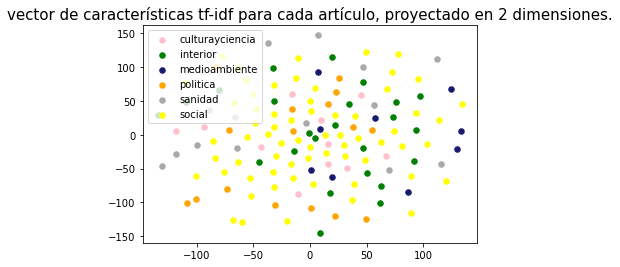

In [8]:
#En este bloque se imprime una grafica punteada de un ejemplo del 30% de los datos de la matriz tf-idf
SAMPLE_SIZE = int(len(features) * 0.2)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey', 'yellow']
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("vector de características tf-idf para cada artículo, proyectado en 2 dimensiones.",
          fontdict=dict(fontsize=15))
plt.legend()

In [9]:
#En este bloque podemos buscar palabras que contengan los titulos del dataframe
df[df.title.str.contains('mayores')]

,category,title,content,category_id
553,social,Mejorar la calidad de vida de las personas may...,as precariedades del Adulto Mayor que se tradu...,5
598,social,Pensiones a los adultos mayores,Todos sabemos que hoy en día los adultos mayor...,5
668,social,Sistema de reparto equitativo para adultos may...,Un sistema solidario y de reparto con pensione...,5


In [10]:
#En este bloque se puede ver que archivos contienen el termino que queramos buscar en nuestro data frame
df[df.content.str.lower().str.contains('pobreza')].category.value_counts()

social      4
interior    4
Name: category, dtype: int64

In [11]:
#En este bloque entrenamos varios modelos (Random Forest, Naive Bayes, Regresion Logistica, Arbol de Decision y LinearSVC) para decidir cual es el mejor
models = [
    RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=4 ,random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    LinearSVC()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

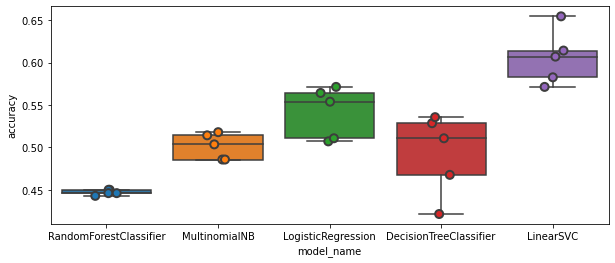

In [12]:
#En este bloque se muestra una grafica de la precision de los modelos entrenados
fig = plt.figure(figsize=(10,4))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [13]:
#En este bloque se muestra los valores de precision de cada modelo
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.492826
LinearSVC                 0.606053
LogisticRegression        0.541521
MultinomialNB             0.501459
RandomForestClassifier    0.446989
Name: accuracy, dtype: float64

In [16]:
#Dividimos los datos de entrenamiento y test, y realizamos el balanceo de los datos
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.1, random_state=42)
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

Precision: 0.650
Recall: 0.486
F1 Score: 0.497


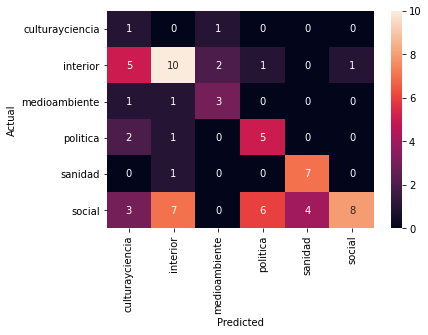

In [17]:
#En este bloque entrenamos otra vez con Naive Bayes y mostramos su matriz de confusión
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('Precision: %.3f' % precision_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))

Precision: 0.547
Recall: 0.486
F1 Score: 0.503


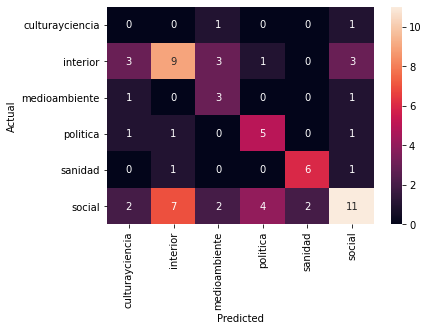

In [18]:
#En este bloque entrenamos otra vez con Clasificación de vectores de soporte lineal y mostramos su matriz de confusión
model = LinearSVC()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('Precision: %.3f' % precision_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))

Precision: 0.517
Recall: 0.314
F1 Score: 0.335


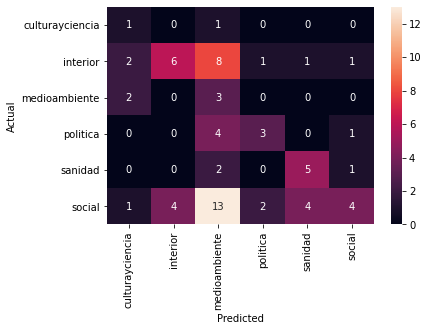

In [19]:
#En este bloque entrenamos otra vez con Arbol de Decision y mostramos su matriz de confusión
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('Precision: %.3f' % precision_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))

Precision: 0.599
Recall: 0.543
F1 Score: 0.556


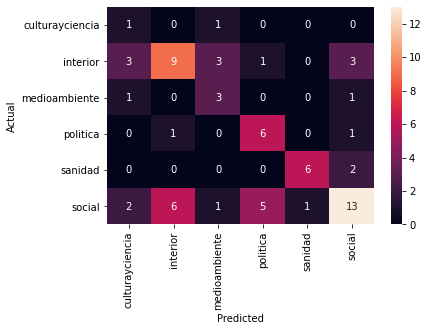

In [22]:
#En este bloque entrenamos otra vez con Regresion Logistica y mostramos su matriz de confusión
model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('Precision: %.3f' % precision_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('Recall: %.3f' % recall_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))

In [23]:
#En este bloque testeamos el modelo que se ha decidido usar al final
texts = ["Nos gustaria mejorar las calles de nuestro barrio.",
         "Faltan hospitales en mi pueblo.",
         "Hay que fomentar la innovacion y el emprendimiento",
         "Apoyo a la investigacion de energias renovables.",
         "Ayudas para los desempleados de larga duración"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Se predice como: '{}'".format(id_to_category[predicted]))
  print("")

"Nos gustaria mejorar las calles de nuestro barrio."
  - Se predice como: 'medioambiente'

"Faltan hospitales en mi pueblo."
  - Se predice como: 'sanidad'

"Hay que fomentar la innovacion y el emprendimiento"
  - Se predice como: 'medioambiente'

"Apoyo a la investigacion de energias renovables."
  - Se predice como: 'culturayciencia'

"Ayudas para los desempleados de larga duración"
  - Se predice como: 'social'

